In [12]:
# for QR codes use inline
%matplotlib inline
qr_setting = 'url'
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from matplotlib import animation
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# Markov Chains

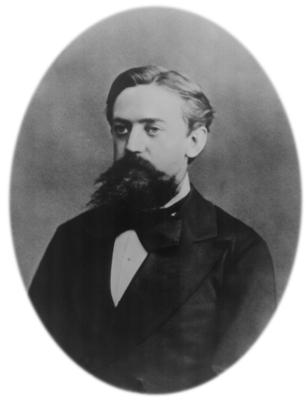

In [2]:
# Image credit: http://en.wikipedia.org/wiki/Andrey_Markov#mediaviewer/File:AAMarkov.jpg
display(Image("images/AAMarkov.jpg", width=250))
display(HTML("<b>Andrei Markov, 1856 - 1922, St Petersburg.</b>"))

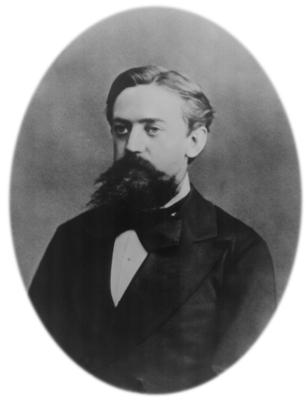

In [3]:
# Image credit: http://en.wikipedia.org/wiki/Andrey_Markov#mediaviewer/File:AAMarkov.jpg
display(Image("images/AAMarkov.jpg", width=250))
display(HTML("<b>Andrei Markov, 1856 - 1922, St Petersburg.</b>"))

In [4]:
HTML('<a href="http://commons.wikimedia.org/wiki/File:AAMarkov.jpg#/media/File:AAMarkov.jpg">AAMarkov</a> by unknown; originally uploaded to en-wikipedia by <a href="//en.wikipedia.org/wiki/User:Mhym" class="extiw" title="en:User:Mhym">en:User:Mhym</a> - From the official web site of the <a href="//en.wikipedia.org/wiki/Russian_Academy_of_Sciences" class="extiw" title="en:Russian Academy of Sciences">Russian Academy of Sciences</a>: <a rel="nofollow" class="external free" href="http://www.ras.ru/win/db/show_per.asp?P=.id-53175.ln-en.dl-.pr-inf.uk-0">http://www.ras.ru/win/db/show_per.asp?P=.id-53175.ln-en.dl-.pr-inf.uk-0</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.')

Markov was part of the great tradition of mathematics in Russia.

Markov started out working in number theory but then got interested in probability.  He enjoyed poetry and the great Russian poet Pushkin.   Markov studied the sequence of letters found in the text of _Eugene Onegin,_ in particular the sequence of consonants and vowels.   

He sought a way to describe patterns in sequences, such as text like _Eugene Onegin_.  This eventually led to the idea of a system in which one transitions between states, and the probability of going to another state depends only on the current state.

Hence, Markov pioneered the study of systems in which the future state of the system depends only on the present state in a random fashion.  This has turned out to be a terrifically useful idea.  For example, it is the starting point for analysis of the movement of stock prices, and the dynamics of animal populations.  

These have since been termed "Markov Chains."   

Markov chains are essential tools in understanding, explaining, and predicting phenomena in computer science, physics, biology, economics, and finance.

Today we will study an application of linear algebra.  You will see how the concepts we use, such as vectors and matrices, get applied to a particular problem.

Many applications in computing are concerned with how a system behaves over time.   

Think of a Web server that is processing requests for Web pages, or network that is moving packets from place to place.  

We would like to describe how systems like these operate, and analyze them to understand their performance limits.

The way we model this is: 

* we define some vector that describes the state of the system, and 
* we formulate a rule that tells us how to compute the next state of the system based on the current state of the system.

So we would say that the state of the system at time $k$ is a vector ${\bf x_k} \in \mathbb{R}^n,$ and

$${\bf x_{k+1}} = T({\bf x_k}),\;\;\;\mbox{for time}\;k=0,1,2...$$

where $T: \mathbb{R}^n \rightarrow \mathbb{R}^n.$

This situation is so common that it goes by many names:

* In physics, this is called a __dynamical system__.  
    * Here, ${\bf x_k}$ might represent the position and velocity of a particle.
    
* When studying algorithms, this is called a __recurrence relation.__  
    * Here, ${\bf x_k}$ might represent the number of steps needed to solve a problem of size $k$.
    
* Most commonly, this is called a __difference equation.__ 
    * The reason for this terminology is that it is a discrete analog of a differential equation in $k$.

The vector ${\bf x_k}$ is called the _state vector._

Of course, we are going to be particularly interested in the case where $T$ is a linear transformation.   

Then we know that we can write the difference equation as:

$$ {\bf x_{k+1}} = A{\bf x_k},$$

where $A \in \mathbb{R}^{n\times n}.$   

This is a _linear difference equation._

__Example.__ 

Here is our warm-up problem.

We are interested in the population of two regions, say the city and the suburbs.  

Fix an initial year (say 2000) and let 

$$ {\bf x_0} = \left[\begin{array}{cc}\mbox{population of the city in 2000}\\\mbox{population of the suburbs in 2000}\end{array}\right].$$


Then

$$ {\bf x_1} = \left[\begin{array}{cc}\mbox{population of the city in 2001}\\\mbox{population of the suburbs in 2001}\end{array}\right],$$

$${\bf x_2} = \left[\begin{array}{cc}\mbox{population of the city in 2002}\\\mbox{population of the suburbs in 2002}\end{array}\right],$$

$$\dots \mbox{etc.}$$

We only concern ourselves with movements of people between the two regions. 
* no immigration, emigration, birth, death, etc.

We assume that measurements have shown the following pattern: 

in any given year, 

* 5% of the people in the city move to the suburbs, and 
* 3% of the people in the suburbs move to the city.

You can think of this as:

$$\begin{array}{rcc}&\mbox{From City}&\mbox{From Suburbs}\\\mbox{To City}& .95&.03\\\mbox{To Suburbs}&.05&.97\end{array}$$

Then we can capture this update rule as a matrix:

$$A = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right].$$

We can see that this is correct by verifying that:

$$\left[\begin{array}{cc}\mbox{city pop. in 2001}\\\mbox{suburb pop. in 2001}\end{array}\right] =\left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right] \left[\begin{array}{cc}\mbox{city pop. in 2000}\\\mbox{suburb pop. in 2000}\end{array}\right].$$

## Markov Chains

Let's look at $A$ again:

$$A = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right].$$

We note that $A$ has a special property: each of its columns adds up to 1.   

Also, it would not make sense to have negative entries in $A$.

The reason that columns sum to 1 is that the total number of people in the system is not changing over time.   

This leads to three definitions:

__Definition.__ A _probability vector_ is a vector of nonnegative entries that sums to 1.  

__Definition.__ A _stochastic_ matrix is a square matrix of nonnegative values whose columns each sum to 1.

__Definition.__ A _Markov chain_ is a dynamical system whose state is a probability vector and which evolves according to a stochastic matrix.  

That is, it is a probability vector ${\bf x_0}$ and a stochastic matrix $A \in \mathbb{R}^{n\times n}$ such that 

$${\bf x_{k+1}} = A{\bf x_k}\;\;\;\mbox{for}\;k = 0,1,2,...$$

So we think of a probability vector ${\bf x_0}$ as describing how things are "distributed" across various categories -- the fraction of items that are in each category. 

And we think of the stochastic matrix $A$ as describing how things "redistribute" themselves at each time step.

``` {toggle} 
Question Time! Q11.1
```

__Example.__ Suppose that in 2000 the population of the city is 600,000 and the population of the suburbs is 400,000.  What is the distribution of the population in 2001?  In 2002?  In 2020?

__Solution.__ First, we convert the population distribution to a probability vector.  This is done by simply normalizing by the sum of the vector elements.

$$600,000 + 400,000 = 1,000,000.$$

$$\frac{1}{1,000,000}\left[\begin{array}{rr}600,000\\400,000\end{array}\right] = \left[\begin{array}{rr}0.60\\0.40\end{array}\right].$$

Then the distribution of population in 2001 is:

$$ {\bf x_{1}} = A{\bf x_0} = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right]\left[\begin{array}{rr}0.60\\0.40\end{array}\right] = \left[\begin{array}{rr}0.582\\0.418\end{array}\right].$$

And the distribution of the population in 2002 is:

$$ {\bf x_{2}} = A{\bf x_1} = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right]\left[\begin{array}{rr}0.582\\0.418\end{array}\right] = \left[\begin{array}{rr}0.565\\0.435\end{array}\right].$$

Note that another way we could have written this is:

$$ {\bf x_{2}} = A{\bf x_1} = A(A{\bf x_0}) = A^2 {\bf x_0}.$$

To answer the question for 2020, i.e., $k=20,$ we note that 

$${\bf x_{20}} = \overbrace{A\cdots A}^{20} {\bf x_0} = A^{20}{\bf x_0}.$$

In [5]:
# stochastic matrix A
A = np.array(
    [[0.95,0.03],
     [0.05,0.97]])
#
# initial state vector x_0
x_0 = np.array([0.60,0.40])
#
# compute A^20
A_20 = np.linalg.matrix_power(A, 20)
#
# compute x_20
x_20 = A_20 @ x_0
print(x_20)

[0.417456 0.582544]


So we find that after 20 years, only 42% of the population will remain in the city.

``` {toggle}
Question Time! Q11.2
```

## Predicting the Distant Future

We noticed that the population of the city is going down.  Will everyone eventually live in the suburbs?

A important question about a Markov Chain is: what will happen in the distant future?

For example, what happens to the population distribution in our example "in the long run?"  

Rather than answering that question right now, we'll take a more interesting example.

Suppose we have a system whose state transition is described by the stochastic matrix

$$P = \left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right]$$

and which starts int the state 

$${\bf x_0} = \left[\begin{array}{r}1\\0\\0\end{array}\right].$$

Consider the Markov Chain defined by $P$ and ${\bf x_0}$, that is the chain defined as 

$${\bf x_{k+1}} = P{\bf x_k}\;\;\;\mbox{for}\;k=0,1,2...$$

What happens to the system as time passes?

Let's compute the state vectors ${\bf x_1},\dots,{\bf x_{15}}$ to find out.

In [6]:
# stochastic matrix A
A = np.array(
    [[.5,.2,.3],
     [.3,.8,.3],
     [.2, 0,.4]])
#
# initial state vector
x = np.array([1,0,0])
#
# array to hold each future state vector
xs = np.zeros((15,3))
# 
# compute future state vectors
for i in range(15):
    xs[i] = x
    print(f'x({i}) = {x}')
    x = A @ x

x(0) = [1 0 0]
x(1) = [0.5 0.3 0.2]
x(2) = [0.37 0.45 0.18]
x(3) = [0.329 0.525 0.146]
x(4) = [0.3133 0.5625 0.1242]
x(5) = [0.30641 0.58125 0.11234]
x(6) = [0.303157 0.590625 0.106218]
x(7) = [0.3015689 0.5953125 0.1031186]
x(8) = [0.30078253 0.59765625 0.10156122]
x(9) = [0.30039088 0.59882813 0.10078099]
x(10) = [0.30019536 0.59941406 0.10039057]
x(11) = [0.30009767 0.59970703 0.1001953 ]
x(12) = [0.30004883 0.59985352 0.10009765]
x(13) = [0.30002441 0.59992676 0.10004883]
x(14) = [0.30001221 0.59996338 0.10002441]


What is going on here?  Let's look at these values graphically.

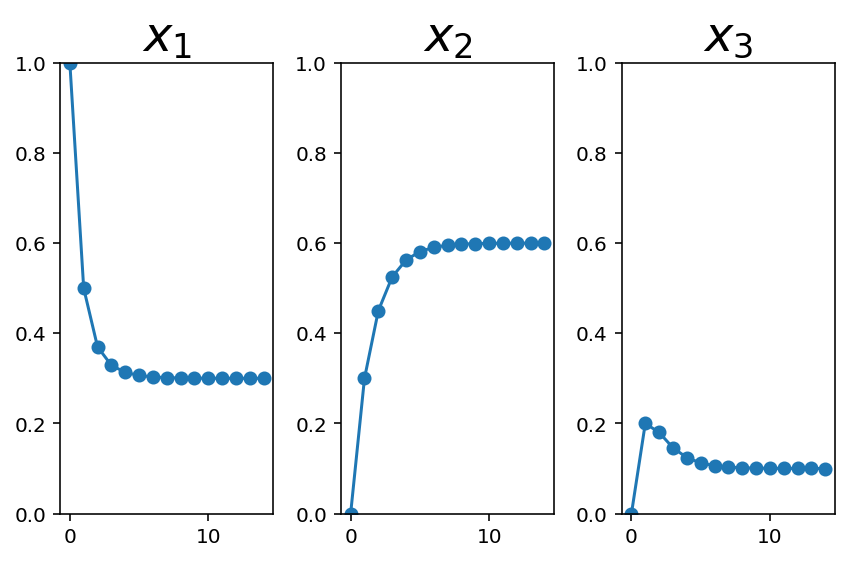

In [7]:
ax = plt.subplot(131)
plt.plot(range(15),xs.T[0],'o-')
ax.set_ylim([0,1])
plt.title(r'$x_1$',size=24)
ax = plt.subplot(132)
plt.plot(range(15),xs.T[1],'o-')
ax.set_ylim([0,1])
plt.title(r'$x_2$',size=24)
ax = plt.subplot(133)
plt.plot(range(15),xs.T[2],'o-')
ax.set_ylim([0,1])
plt.title(r'$x_3$',size=24)
plt.tight_layout()

Based on visual inspection, these vectors seem to be approaching

$${\bf q} = \left[\begin{array}{r}.3\\.6\\.1\end{array}\right].$$

The components of ${\bf x_k}$ don't seem to be changing much past about $k = 10.$

In fact, we can confirm that the this system would be stable at $\left[\begin{array}{r}.3\\.6\\.1\end{array}\right]$ by noting that:

$$\left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right]\left[\begin{array}{r}.3\\.6\\.1\end{array}\right] = \left[\begin{array}{r}.15+.12+.03\\.09+.48+.03\\.06+0+.04\end{array}\right] = \left[\begin{array}{r}.3\\.6\\.1\end{array}\right].$$

This calculation is exact.  So it seems that:

* the sequence of vectors is approaching $\left[\begin{array}{r}.3\\.6\\.1\end{array}\right]$ as a limit, and 
* when and if they get to that point, they will stabilize there.

## Steady-State Vectors

This convergence to a "steady state" is quite remarkable.  Is this a general phenomenon?   

__Definition.__ If $P$ is a stochastic matrix, then a __steady-state vector__ (or __equilibrium vector__) for $P$ is a probability vector $\bf q$  such that:

$$P{\bf q} = {\bf q}.$$

It can be shown that __every stochastic matrix has at least one steady-state vector.__ 

(We'll study this more closely in a later lecture.)

__Example.__

$\left[\begin{array}{r}.3\\.6\\.1\end{array}\right]$ is the steady-state vector for $\left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right].$

__Example.__

Recalling the population-movement example above.

The probability vector ${\bf q} = \left[\begin{array}{r}.375\\.625\end{array}\right]$ is a steady-state vector for the population migration matrix $A$, because

$$A{\bf q} = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right]\left[\begin{array}{r}.375\\.625\end{array}\right] = \left[\begin{array}{r}.35625+.01875\\.01875+.60625\end{array}\right] = \left[\begin{array}{r}.375\\.625\end{array}\right] = {\bf q}.$$

To interpret this: 

* if the total population of the region is 1 million, 
* then if there are 375,000 persons in the city and 625,000 persons in the suburbs, 
* the populations of both the city and the suburbs would stabilize -- they would __stay the same in all future years.__

## Finding the Steady State

OK, so it seems that the two Markov Chains we have studied so far each have a steady state.   This leads to two questions:

* Can we compute the steady state?  
    * So far we have guessed what the steady state is, and then checked.  Can we compute the steady state directly?

* How do we know if:
    * a Markov Chain has a unique steady state, and 
    * whether it will always converge to that steady state?

Let's start by thinking about how to compute the steady-state directly.

__Example.__  Let $P = \left[\begin{array}{rr}.6&.3\\.4&.7\end{array}\right].$  Find a steady-state vector for $P$.

__Solution.__ Let's simply solve the equation $P{\bf x} = {\bf x}.$

$$P{\bf x} = {\bf x}$$

$$P{\bf x} -{\bf x} = {\bf 0}$$

$$P{\bf x} -I{\bf x} = {\bf 0}$$

$$(P-I){\bf x} = {\bf 0}$$

Now, $P-I$ is a matrix, so this is a linear system that we can solve.

$$P-I = \left[\begin{array}{rr}.6&.3\\.4&.7\end{array}\right] - \left[\begin{array}{rr}1&0\\0&1\end{array}\right] = \left[\begin{array}{rr}-.4&.3\\.4&-.3\end{array}\right].$$

To find all solutions of $(P-I){\bf x} = {\bf 0},$ we row reduce the augmented matrix:

$$\left[\begin{array}{rrr}-.4&.3&0\\.4&-.3&0\end{array}\right] \sim \left[\begin{array}{rrr}-.4&.3&0\\0&0&0\end{array}\right] \sim \left[\begin{array}{rrr}1&-3/4&0\\0&0&0\end{array}\right].$$

So $x_1 = \frac{3}{4}x_2$ and $x_2$ is free.  The general solution is $\left[\begin{array}{c}\frac{3}{4}x_2\\x_2\end{array}\right].$

This means that there are an infinite set of solutions.  Which one are we interested in?

Remember that our vectors ${\bf x}$ are _probability vectors._   So we are interested in the solution in which the vector elements are nonnegative and sum to 1.  

The simple way to find this is to take any solution, and divide it by the sum of the entries (so that the sum then adds to 1.)  

Let's choose $x_2 = 1$, so the specific solution is:

$$\left[\begin{array}{r}\frac{3}{4}\\1\end{array}\right].$$

Normalizing this by the sum of the entries ($\frac{7}{4}$) we get:

$${\bf q} = \left[\begin{array}{r}\frac{3}{7}\\\frac{4}{7}\end{array}\right].$$

So, we have found how to solve a Markov Chain for its steady state:

* Solve the linear system $(P-I){\bf x} = {\bf 0}.$  
* The system will have an infinite number of solutions, with one free variable.  Obtain a general solution.
* Pick any specific solution (choose any value for the free variable), and normalize it so the entries add up to 1.


## Existence of, and Convergence to, Steady State

Finally: when does a system have a __unique__ solution that is a probability vector, and how do we know it will converge to that vector? 

Of course, a linear system in general might have no solutions, or it might have a unique solution that is not a probability vector.  

So what we are asking is, when does a system defined by a Markov Chain have an infinite set of solutions, so that we can find one of them that is a probability vector?

__Definition.__  We say that a stochastic matrix $P$ is _regular_ if some matrix power $P^k$ contains only strictly positive entries.  

For 

$$P =\left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right],$$

We note that $P$ does not have every entry strictly positive.  

However:

$$P^2 = \left[\begin{array}{rrr}.37&.26&.33\\.45&.70&.45\\.18&.04&.22\end{array}\right].$$

Since every entry in $P^2$ is positive, $P$ is a regular stochastic matrix.

__Theorem.__ If $P$ is an $n\times n$ regular stochastic matrix, then $P$ has a unique steady-state vector ${\bf q}.$  Further, if ${\bf x_0}$ is any initial state and ${\bf x_{k+1}} = P{\bf x_k}$ for $k = 0, 1, 2,\dots,$ then the Markov Chain $\{{\bf x_k}\}$ converges to ${\bf q}$ as $k \rightarrow \infty.$

Note the phrase "any initial state."  

This is a remarkable property of a Markov Chain: it converges to its steady-state vector __no matter what state the chain starts in.__

We say that the long-term behavior of the chain has "no memory of the starting state."


``` {toggle}
Question Time! Q11.3
```

__Example.__  Consider a computer system that consists of a disk, a CPU, and a network interface.  

A set of jobs are loaded into the system.   Each job makes requests for service from each of the components of the system.

After receiving service, the job then next requests service from the same or a different component, and so on.  

Jobs move between system components according to the following diagram.   

For example, after receiving service from the Disk, 70% of jobs return to the disk for another unit of service;  20% request service from the network interface;  and 10% request service from the CPU.

<!-- image credit: my own drawing -->

<center>

<img src="images/disk-cpu-net.png" alt="Figure" width="50%">
    
</center>

Assume the system runs for a long time.  Determine whether the system will stabilize, and if so, find the fraction of jobs that are using each device once stabilized.   Which device is busiest?  Least busy?

__Solution.__  From the diagram, the movement of jobs among components is given by:

$$ \begin{array}{rccc}&\mbox{From Disk}&\mbox{From Net}&\mbox{From CPU}\\\mbox{To Disk}&0.70&0.10&0.30\\\mbox{To Net}&0.20&0.80&0.30\\\mbox{To CPU}&0.10&0.10&0.40\end{array}$$

This corresponds to the stochastic matrix:

$$P = \left[\begin{array}{rrr}0.70&0.10&0.30\\0.20&0.80&0.30\\0.10&0.10&0.40\end{array}\right].$$

First of all, this is a regular matrix because $P$ has all strictly positive entries.  So it has a steady-state vector.

Next, we find the steady state of the system by solving $(P-I){\bf x} = {\bf 0}:$

$$[P-I\; {\bf 0}] = \left[\begin{array}{rrrr}-0.30&0.10&0.30&0\\0.20&-0.20&0.30&0\\0.10&0.10&-0.60&0\end{array}\right] \sim \left[\begin{array}{rrrr}1&0&-9/4&0\\0&1&-15/4&0\\0&0&0&0\end{array}\right].$$

Thus the general solution of $(P-I){\bf x} = {\bf 0}$ is 

$$x_1 = \frac{9}{4} x_3, \;\;\; x_2 = \frac{15}{4} x_3,\;\;\; x_3\;\mbox{free.}$$

Since $x_3$ is free (there are infinitely many solutions) we can find a solution whose entries sum to 1.   This is:

$${\bf q} \approx \left[\begin{array}{r}.32\\.54\\.14\end{array}\right].$$

So we see that in the long run, 
* about 32% of the jobs will be using the disk, 
* about 54% will be using the network interface, and 
* about 14% will be using the CPU.

Again, the important fact here is that we did not have to concern ourselves with the state in which that the system started. 

The influence of the starting state is eventually lost!

Let's demonstrate that computationally.   Let's say that at the start, all the jobs happened to be using the CPU.  Then:

$${\bf x}_0 = \left[\begin{array}{r}0\\0\\1\end{array}\right].$$

Then let's look at how the three elements of the ${\bf x}$ vector evolve with time, by computing $P{\bf x}_0$, $P^2{\bf x}_0$, $P^3{\bf x}_0$, etc.

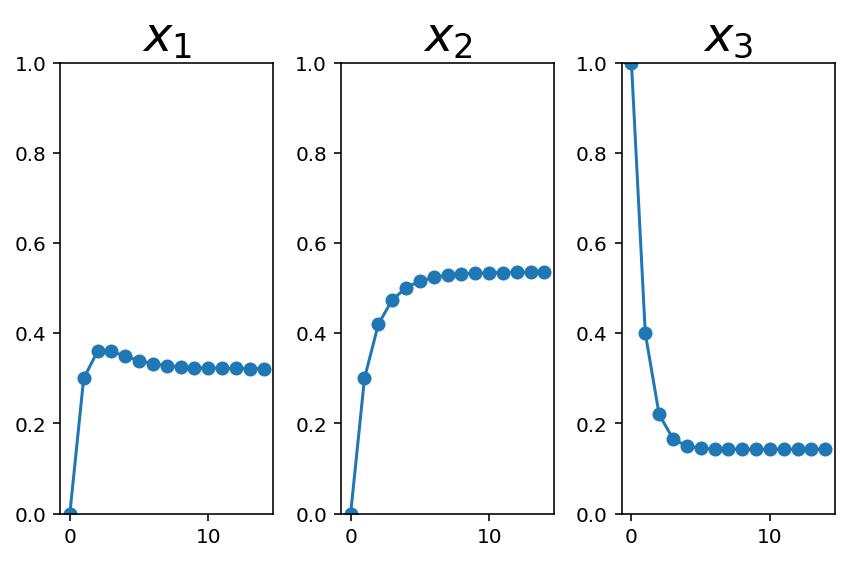

In [9]:
#
# system definition
A = np.array(
    [[.7,.1,.3],
     [.2,.8,.3],
     [.1,.1,.4]])
x = np.array([0,0,1])
xs = np.zeros((15,3))
#
# compute 15 steps in the evolution of the system stae
for i in range(15):
    xs[i] = x
    x = A @ x
#
# plot the results
ax = plt.subplot(131)
plt.plot(range(15),xs.T[0],'o-')
ax.set_ylim([0,1])
plt.title(r'$x_1$',size=24)
ax = plt.subplot(132)
plt.plot(range(15),xs.T[1],'o-')
ax.set_ylim([0,1])
plt.title(r'$x_2$',size=24)
ax = plt.subplot(133)
plt.plot(range(15),xs.T[2],'o-')
ax.set_ylim([0,1])
plt.title(r'$x_3$',size=24)
plt.tight_layout()

Notice how the system starts in the state $\left[\begin{array}{r}0\\0\\1\end{array}\right]$,

but quickly (within about 10 steps) reaches the equilibrium state that we predicted: $\left[\begin{array}{r}.32\\.54\\.14\end{array}\right].$

Now let's compare what happens if the system starts in a different state, say $\left[\begin{array}{r}1\\0\\0\end{array}\right]$:

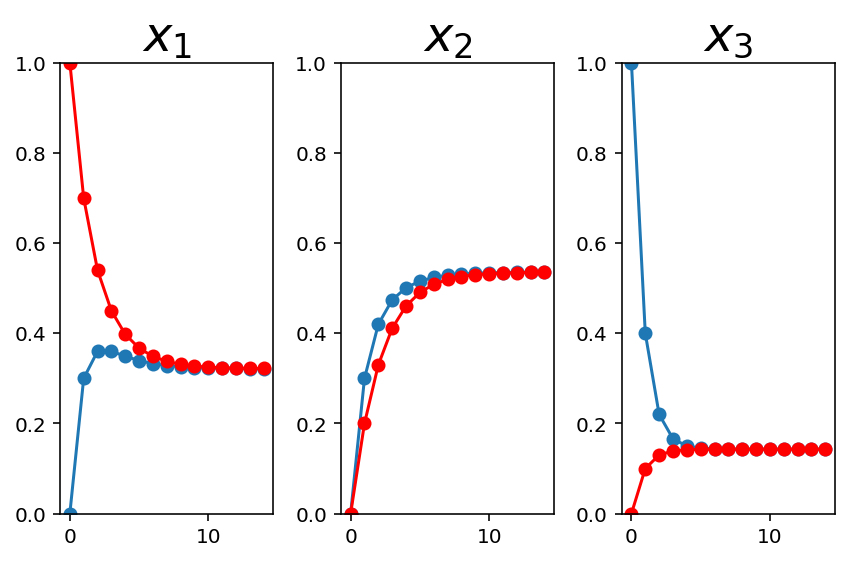

In [10]:
A = np.array([[.7,.1,.3],[.2,.8,.3],[.1,.1,.4]])
x = np.array([1,0,0])
ys = np.zeros((15,3))
for i in range(15):
    ys[i] = x
    x = A.dot(x)
ax = plt.subplot(131)
plt.plot(range(15),xs.T[0],'o-',range(15),ys.T[0],'o-r')
ax.set_ylim([0,1])
plt.title(r'$x_1$',size=24)
ax = plt.subplot(132)
plt.plot(range(15),xs.T[1],'o-',range(15),ys.T[1],'o-r')
ax.set_ylim([0,1])
plt.title(r'$x_2$',size=24)
ax = plt.subplot(133)
plt.plot(range(15),xs.T[2],'o-',range(15),ys.T[2],'o-r')
ax.set_ylim([0,1])
plt.title(r'$x_3$',size=24)
plt.tight_layout()

This shows graphically that even though the system started in a very different state, it quickly converges to the steady state regardless of the starting state.

In [16]:
A = np.array([[.7,.1,.3],[.2,.8,.3],[.1,.1,.4]])
x = np.array([[0., 0., 1.], [1., 0., 0.], [0., 1., 0.], [0.5, 0., 0.5], [0., 0.5, 0.5], [0.5, 0.5, 0.]]).T
colors = ['r', 'b', 'g', 'y', 'c', 'm']
npts = x.shape[1]
fig = ut.three_d_figure((11, 1), fig_desc = 'Convergence to Steady State',
                        xmin = 0, xmax = 1, ymin = 0, ymax = 1, zmin = 0, zmax = 1, qr = None)
plt.close()
for pt in range(npts):
    fig.plotPoint(x[0][pt], x[1][pt], x[2][pt], colors[pt])
for i in range(10):
    xnext = A @ x
    for pt in range(npts):
        # fig.plotPoint(xnext[0][pt], xnext[1][pt], xnext[2][pt], colors[pt])
        fig.plotLine(np.array([[x[0][pt], xnext[0][pt]], [x[1][pt], xnext[1][pt]], [x[2][pt], xnext[2][pt]]]).T, 
                     colors[pt])
    x = xnext
fig.text(x[0][0]-0.05, x[1][0], x[2][0]+0.05, 'Steady State', 'Steady State', 12)
fig.plotPoint(x[0][0], x[1][0], x[2][0], 'k')
fig.ax.view_init(azim=40.0,elev=20.0)
fig.save()
#
def anim(frame):
    fig.ax.view_init(azim = frame, elev = 20)
    # fig.canvas.draw()
#
# create and display the animation 
HTML(animation.FuncAnimation(fig.fig, anim,
                       frames = 5 * np.arange(72),
                       fargs = None,
                       interval = 100).to_jshtml(default_mode = 'loop'))

Although we have been showing each component converging separately, in fact the entire state vector of the system can be thought of as evolving in space.

This figure shows the movement of the state vector starting from six different initial conditions, and shows how regardless of the starting state, the eventual state is the same.

### Summary

* Many phenomena can be describe using Markov's idea:
    * There are "states", and
    * Transition between states only depends on the current state.
* Examples: population movement, jobs in a computer, consonants/vowels in a text...
* Such a system can be expressed in terms of a stochastic matrix and a probability vector.
* Evolution of the system in time is described by matrix multiplication.
* Using linear algebraic tools we can predict the steady state of such a system!